In [1]:
from sklearn.datasets.samples_generator import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

C:\Anaconda3\envs\nlpiaenv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# prepare multi-class classification dataset
def create_dataset():
    
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2,
    random_state=2)

    # one hot encode output variable
    y = to_categorical(y)

    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    print('trainX.shape :',trainX.shape)
    print('testy.shape :',testy.shape)
    
    return trainX, trainy, testX, testy

In [3]:
# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    
    # configure the model based on the data
    n_input, n_classes = trainX.shape[1], testy.shape[1]

    # define model
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))

    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit model on train set
    history = model.fit(trainX, trainy, epochs=100, verbose=0)

    # evaluate model on test set
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc

In [4]:
# prepare dataset
trainX, trainy, testX, testy = create_dataset()

trainX.shape : (500, 100)
testy.shape : (500, 20)


In [5]:
# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7]

nodes=1: 0.152
nodes=2: 0.254
nodes=3: 0.552
nodes=4: 0.912
nodes=5: 1.000
nodes=6: 0.940
nodes=7: 1.000


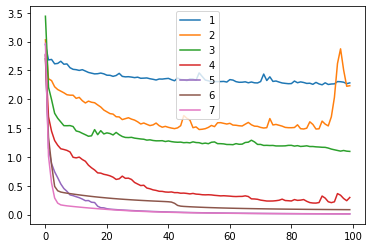

In [6]:
for n_nodes in num_nodes:
    
    # evaluate model with a given number of nodes
    history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)

    # summarize final test set accuracy
    print('nodes=%d: %.3f' % (n_nodes, result))

    # plot learning curve
    pyplot.plot(history.history['loss'], label=str(n_nodes))
    
# show the plot
pyplot.legend()
pyplot.show()    

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
'''In this case, we can see that as the number of nodes is increased, the capacity of the model
to learn the problem is increased. This results in a progressive lowering of the generalization
error of the model on the test dataset until 6 and 7 nodes when the model learns the problem almost
perfectly.'''

In [ ]:
'''This plot shows the direct relationship between model capacity, as
defined by the number of nodes in the hidden layer and the model's ability to learn.'''

In [ ]:
'''The number of nodes can be increased to the point (e.g. 1,000 nodes) where the learning
algorithm is no longer able to sufficiently learn the mapping function.'''